# 【Kaggle超初心者向け】Titanicにチャレンジしてみた
[参考元サイト](https://qiita.com/5sigma_AAA/items/0c23907da9330681147b)
インポート

In [7]:
# imoprt module
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read data
df = pd.read_csv('01-data/titanic/train.csv')

データが読み込めたか確認

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

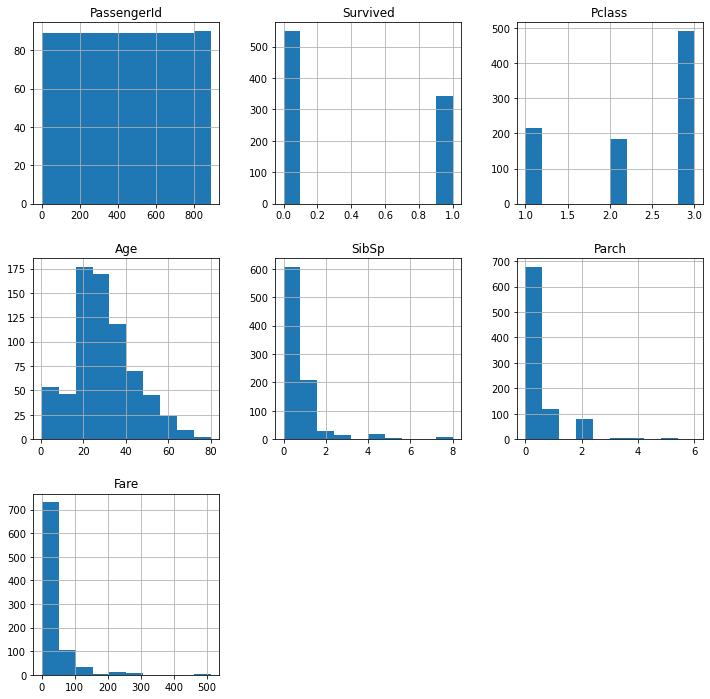

In [10]:
df.hist(figsize = (12,12))

<AxesSubplot:>

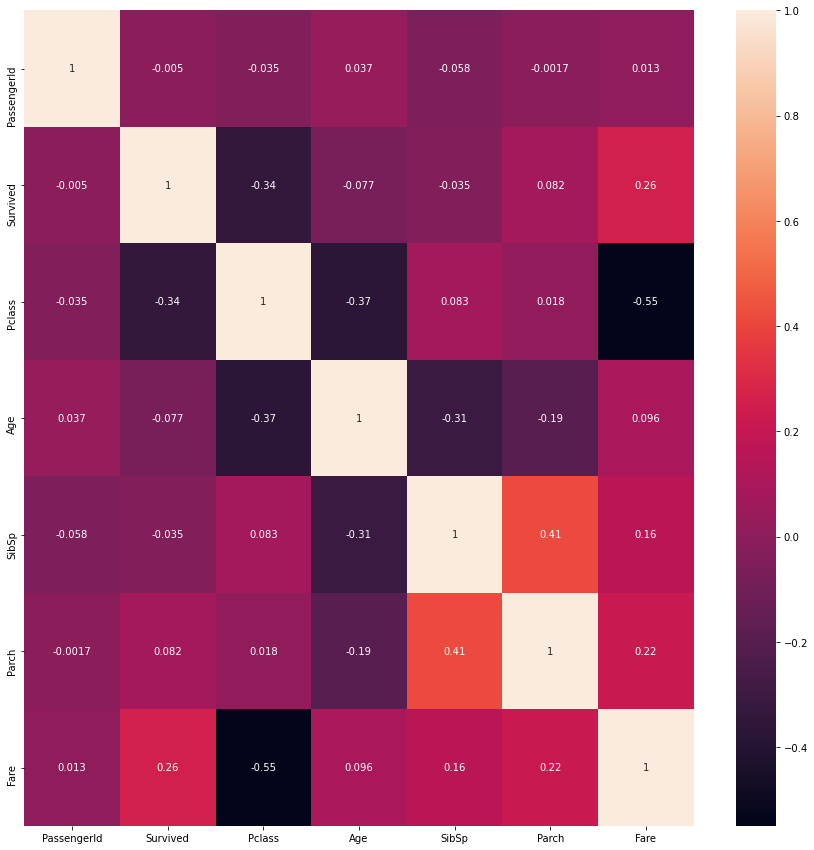

In [11]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

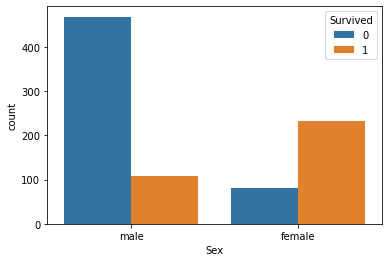

In [12]:
sns.countplot('Sex', hue = 'Survived', data = df)

In [13]:
#各行・列ごとに欠損値を一つでも含むか確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [15]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map({'S': 0 , 'C':1 , 'Q':2}).astype(int)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


In [18]:
#不要なcolumnを削除
df = df.drop(['Cabin','Name','PassengerId','Ticket'], axis =1)

#学習データとテストデータに分割
train_X = df.drop('Survived',axis = 1)
train_y = df.Survived
(train_X , test_X , train_y , test_y) = train_test_split(train_X, train_y , test_size = 0.3 , random_state = 0)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf = clf.fit(train_X , train_y)
pred = clf.predict(test_X)

#正解率の算出
from sklearn.metrics import (roc_curve , auc ,accuracy_score)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y , pred,pos_label = 1)
auc(fpr,tpr)
accuracy_score(pred,test_y)

0.7798507462686567

In [20]:
fin = pd.read_csv('01-data/titanic/test.csv')
fin.head()

passsengerid = fin['PassengerId']
fin.isnull().sum()
fin['Fare'] = fin['Fare'].fillna(fin['Fare'].median())
fin['Age'] = fin['Age'].fillna(fin['Age'].median())
fin['Embarked'] = fin['Embarked'].fillna('S')

#カテゴリ変数の変換
fin['Sex'] = fin['Sex'].apply(lambda x: 1 if x == 'male' else 0)
fin['Embarked'] = fin['Embarked'].map( {'S': 0 , 'C':1 , 'Q':2}).astype(int)

#不要なcolumnを削除
fin= fin.drop(['Cabin','Name','Ticket','PassengerId'],axis =1)
#ランダムフォレストで予測
predictions = clf.predict(fin)

submission = pd.DataFrame({'PassengerId':passsengerid, 'Survived':predictions})
submission.to_csv('submission.csv' , index = False)